In [1]:
import matplotlib.pyplot as plt
import numpy as np

from hazma.scalar_mediator import ScalarMediator

colors = 2*[c["color"] for c in plt.rcParams["axes.prop_cycle"]]

In [2]:
gsxx = 1.0
gsff = 1.0
gsGG = 1.0
gsFF = 1.0
ms = 1.0

vx_mw = 1.0e-3 # DM velocity in Milky Way halo
def ex(mx, vx=vx_mw):
    return mx + 0.5 * mx * vx**2

## Source and convolved spectra

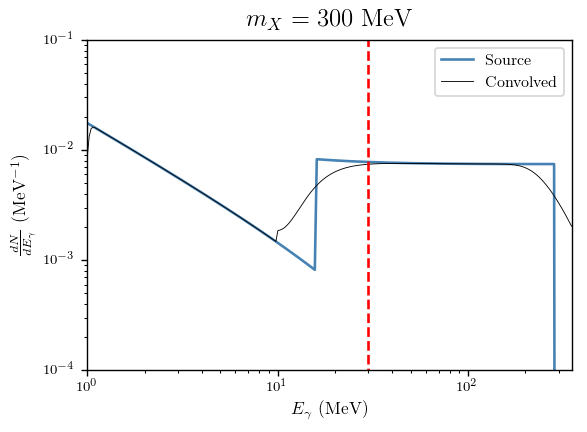

In [15]:
from hazma.gamma_ray_limits.compute_limits import get_detected_spectrum
from hazma.gamma_ray_limits.gamma_ray_limit_parameters import energy_res_comptel, energy_res_e_astrogam

sm = ScalarMediator(300., ms, gsxx, gsff, gsGG, gsFF=1.0)
e_gams = np.logspace(0, np.log10(sm.mx+50), 250)

# Source spectrum
dnde = sm.spectra(e_gams, 2. * ex(sm.mx))["total"]
plt.loglog(e_gams, dnde, label="Source")
# Spectrum at detector
dnde_det = get_detected_spectrum(e_gams, dnde, *sm.gamma_ray_lines(2. * ex(sm.mx)), energy_res=energy_res_e_astrogam)
plt.loglog(e_gams, [dnde_det(e) for e in e_gams], 'k', label="Convolved", linewidth=0.5)

# Break in ASTROGAM's energy resolution
plt.loglog(2*[30], [1e-7, 1e2], '--r')

plt.xlim(e_gams[[0, -1]])
plt.ylim([1e-4, 1e-1])
plt.xlabel(r"$E_\gamma$ (MeV)")
plt.ylabel(r"$\frac{dN}{dE_\gamma}$ (MeV$^{-1}$)")
plt.title(r"$m_X = %.0f$ MeV" % sm.mx)
plt.legend()

## Gamma ray constraints: Galactic Center

In [3]:
from hazma.gamma_ray_limits.gamma_ray_limit_parameters import egret_diffuse, fermi_diffuse, comptel_diffuse, gc_bg_model_target, gc_bg_model
from hazma.gamma_ray_limits.gamma_ray_limit_parameters import A_eff_e_astrogam, T_obs_e_astrogam

### Load Galactic Center limits from __[Weniger+Bartels](https://arxiv.org/pdf/1703.02546)__, for comparison

In [4]:
wb_ee_mxs, wb_ee_lims = np.loadtxt("weniger_bartels_e_e_limits.csv", delimiter=",").T
wb_mumu_mxs, wb_mumu_lims = np.loadtxt("weniger_bartels_mu_mu_limits.csv", delimiter=",").T
wb_gg_mxs, wb_gg_lims = np.loadtxt("weniger_bartels_g_g_limits.csv", delimiter=",").T
wb_pi0g_mxs, wb_pi0g_lims = np.loadtxt("weniger_bartels_pi0_g_limits.csv", delimiter=",").T
wb_pi0pi0_mxs, wb_pi0pi0_lims = np.loadtxt("weniger_bartels_pi0_pi0_limits.csv", delimiter=",").T

### Set up Higgs portal model and model with only the $\gamma\gamma$ final state

In [5]:
s_theta = 0.5
sm_hp = ScalarMediator(mx=1., ms=ms, gsxx=1.0, gsff=s_theta, gsGG=s_theta, gsFF=-s_theta)

sm_line_only = ScalarMediator(mx=1., ms=ms, gsxx=1.0, gsff=0., gsGG=0., gsFF=1.)

# Masses to scan over
mx_min = 0.55
mx_max = 3000.
n_mxs = 50
mxs = np.logspace(np.log10(mx_min), np.log10(mx_max), n_mxs)

### Limits from past experiments

In [9]:
# Higgs portal
lims_egret = sm_hp.binned_limits(mxs, egret_diffuse)
lims_comptel = sm_hp.binned_limits(mxs, comptel_diffuse)
lims_fermi = sm_hp.binned_limits(mxs, fermi_diffuse)

/Users/acoogan/.pyenv/versions/2.7.13/Python.framework/Versions/2.7/lib/python2.7/site-packages/hazma/gamma_ray_limits/compute_limits.py:211: RuntimeWarning: divide by zero encountered in double_scalars
  sv_lims.append(phi_max / phi_dm)
/Users/acoogan/.pyenv/versions/2.7.13/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)
/Users/acoogan/.pyenv/versions/2.7.13/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/integrate/quadpack.py:364: Integr

In [7]:
# Line only
# lims_line_egret = sm_line_only.binned_limits(mxs, egret_diffuse)
# lims_line_comptel = sm_line_only.binned_limits(mxs, comptel_diffuse)
# lims_line_fermi = sm_line_only.binned_limits(mxs, fermi_diffuse)

### Limits from e-ASTROGAM

In [9]:
# Higgs portal
lims_e_astrogam = sm_hp.unbinned_limits(mxs, target_params=gc_bg_model_target, bg_model=gc_bg_model)

# np.savetxt("lims_e_astrogam.csv", lims_e_astrogam)

e_a: 0.061645 -> 0.061645
e_b: 0.184936 -> 0.184936
 


KeyboardInterrupt: 

In [21]:
# lims_e_astrogam = np.loadtxt("lims_e_astrogam.csv")
# lims_e_astrogam[np.isneginf(lims_e_astrogam)] = np.nan

In [18]:
# Line only
# lims_line_e_astrogam = sm_line_only.unbinned_limits(mxs, target_params=gc_bg_model_target, bg_model=gc_bg_model)

### Compare GC constraints

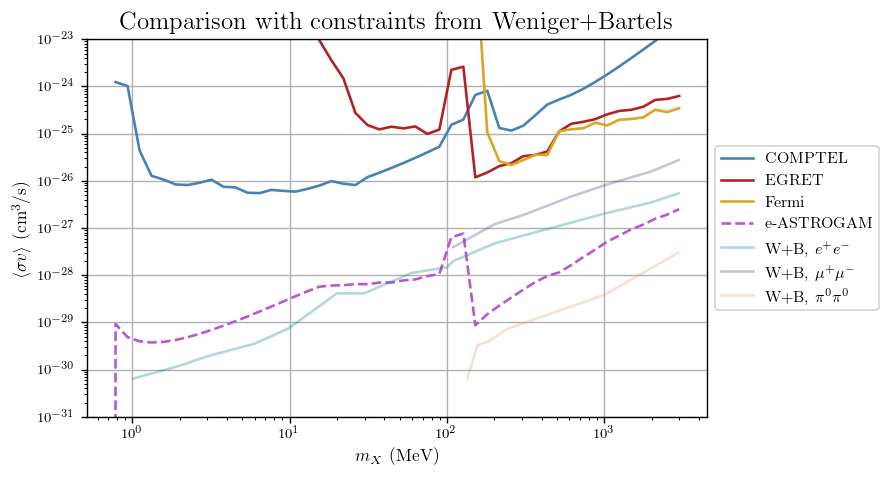

In [23]:
plt.figure(figsize=(8, 4))

# Put a factor of 2 in since WB assume DM is self-conjugate
plt.plot(mxs, lims_comptel, label="COMPTEL", color=colors[0])
plt.plot(mxs, lims_egret, label="EGRET", color=colors[1])
plt.plot(mxs, lims_fermi, label="Fermi", color=colors[2])
plt.plot(mxs, lims_e_astrogam, '--', label="e-ASTROGAM", color=colors[3])

# Plot Weniger+Bartels' constraints
plt.plot(wb_ee_mxs, wb_ee_lims, alpha=0.3, color=colors[4], label=r"W+B, $e^+e^-$")
plt.plot(wb_mumu_mxs, wb_mumu_lims, alpha=0.3, color=colors[5], label=r"W+B, $\mu^+\mu^-$")
plt.plot(wb_pi0pi0_mxs, wb_pi0pi0_lims, alpha=0.3, color=colors[6], label=r"W+B, $\pi^0\pi^0$")

# plt.xlim([0.3, 300])
# plt.xlim(0.3, 280./2.)
plt.ylim([1e-31,1e-23])
plt.xscale("log")
plt.yscale("log")
plt.grid()
plt.xlabel(r"$m_X$ (MeV)")
plt.ylabel(r"$\langle \sigma v \rangle$ (cm$^3$/s)")
plt.title("Comparison with constraints from Weniger+Bartels")

# Shrink current axis by 20%
box = plt.gca().get_position()
plt.gca().set_position([box.x0, box.y0, box.width * 0.8, box.height])
# Put a legend to the right of the current axis
plt.gca().legend(loc='center left', bbox_to_anchor=(1, 0.5))

### Check whether bin edges line up with features

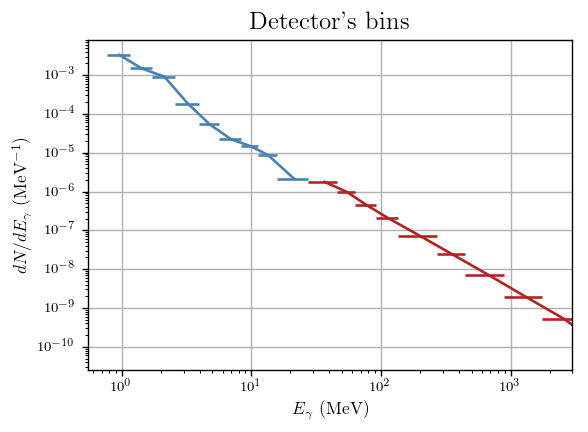

In [12]:
plt.errorbar(np.mean(comptel_diffuse.bins, axis=1),
             comptel_diffuse.fluxes,
             xerr=0.5*(comptel_diffuse.bins[:, 1] - comptel_diffuse.bins[:, 0]))

plt.errorbar(np.mean(egret_diffuse.bins, axis=1),
             egret_diffuse.fluxes,
             xerr=0.5*(egret_diffuse.bins[:, 1] - egret_diffuse.bins[:, 0]))

plt.grid()
plt.xlim(mxs[[0, -1]])
plt.xscale("log")
plt.yscale("log")
plt.title("Detector's bins")
plt.xlabel(r"$E_\gamma$ (MeV)")
plt.ylabel(r"$dN/dE_\gamma$ (MeV$^{-1}$)")

### Galactic Center constraints (without comparison to Weniger)

In [27]:
A_eff_e_astrogam.x

array([3.e-01, 5.e-01, 1.e+00, 2.e+00, 5.e+00, 1.e+01, 3.e+01, 5.e+01,
       7.e+01, 1.e+02, 3.e+02, 5.e+02, 7.e+02, 1.e+03, 3.e+03])

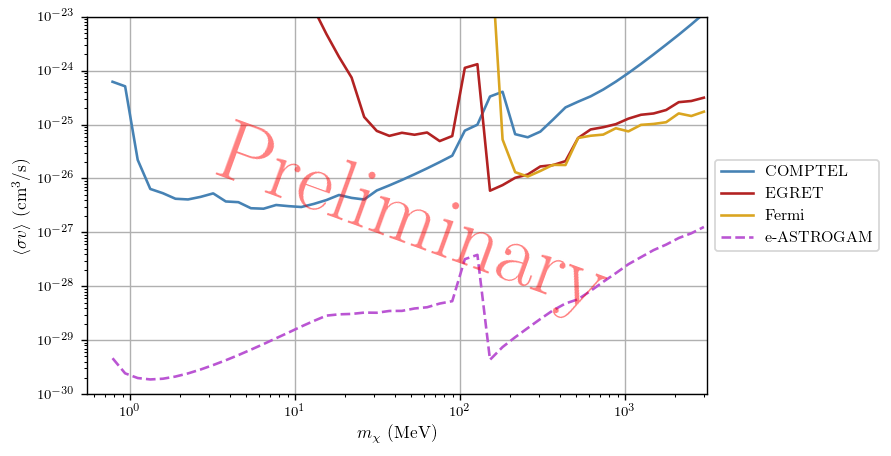

In [48]:
plt.figure(figsize=(8, 4))

# Put a factor of 2 in since WB assume DM is self-conjugate
plt.plot(mxs, lims_comptel, label="COMPTEL", color=colors[0])
plt.plot(mxs, lims_egret, label="EGRET", color=colors[1])
plt.plot(mxs, lims_fermi, label="Fermi", color=colors[2])
plt.plot(mxs, lims_e_astrogam, '--', label="e-ASTROGAM", color=colors[3])

# plt.xlim([0.3, 300])
# plt.xlim(0.3, 280./2.)
plt.xlim(max(mx_min, A_eff_e_astrogam.x[0]))
plt.ylim([1e-30,1e-23])
plt.xscale("log")
plt.yscale("log")
plt.grid()
plt.xlabel(r"$m_\chi$ (MeV)")
plt.ylabel(r"$\langle \sigma v \rangle$ (cm$^3$/s)")

# Shrink current axis by 20%
box = plt.gca().get_position()
plt.gca().set_position([box.x0, box.y0, box.width * 0.8, box.height])
# Put a legend to the right of the current axis
plt.gca().legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.text(3, 1e-26, 'Preliminary', fontsize=50, color='red', alpha=0.5, rotation=-20)
plt.savefig("figures/sigmav_limits.pdf")

## Gamma ray constraints: Draco
These are about 2 orders of magnitude weaker than the GC ones

In [4]:
from hazma.gamma_ray_limits.gamma_ray_limit_parameters import egret_diffuse, fermi_diffuse, comptel_diffuse, comptel_diffuse_target, draco_params, default_bg_model
from hazma.gamma_ray_limits.gamma_ray_limit_parameters import A_eff_e_astrogam, T_obs_e_astrogam

### Load Galactic Center limits from __[Weniger+Bartels](https://arxiv.org/pdf/1703.02546)__, for comparison

In [5]:
wb_ee_mxs, wb_ee_lims = np.loadtxt("weniger_bartels_e_e_limits.csv", delimiter=",").T
wb_mumu_mxs, wb_mumu_lims = np.loadtxt("weniger_bartels_mu_mu_limits.csv", delimiter=",").T
wb_gg_mxs, wb_gg_lims = np.loadtxt("weniger_bartels_g_g_limits.csv", delimiter=",").T
wb_pi0g_mxs, wb_pi0g_lims = np.loadtxt("weniger_bartels_pi0_g_limits.csv", delimiter=",").T
wb_pi0pi0_mxs, wb_pi0pi0_lims = np.loadtxt("weniger_bartels_pi0_pi0_limits.csv", delimiter=",").T

### Set up Higgs portal model

In [7]:
s_theta = 0.5
sm_hp = ScalarMediator(mx=1., ms=ms, gsxx=1.0, gsff=s_theta, gsGG=s_theta, gsFF=-s_theta)

sm_line_only = ScalarMediator(mx=1., ms=ms, gsxx=1.0, gsff=0., gsGG=0., gsFF=1.)

# Masses to scan over
mx_min = 0.55
mx_max = 3000.
n_mxs = 50
mxs = np.logspace(np.log10(mx_min), np.log10(mx_max), n_mxs)

### Limits from past experiments

In [8]:
# Higgs portal
lims_egret = sm_hp.binned_limits(mxs, egret_diffuse)
lims_comptel = sm_hp.binned_limits(mxs, comptel_diffuse)
lims_fermi = sm_hp.binned_limits(mxs, fermi_diffuse)

/Users/acoogan/.pyenv/versions/2.7.13/Python.framework/Versions/2.7/lib/python2.7/site-packages/hazma/gamma_ray_limits/compute_limits.py:211: RuntimeWarning: divide by zero encountered in double_scalars
  sv_lims.append(phi_max / phi_dm)
/Users/acoogan/.pyenv/versions/2.7.13/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)
/Users/acoogan/.pyenv/versions/2.7.13/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/integrate/quadpack.py:364: Integr

### Limits from e-ASTROGAM

In [11]:
# Higgs portal
lims_e_astrogam = sm_hp.unbinned_limits(mxs, target_params=draco_params, bg_model=default_bg_model)

# np.savetxt("lims_e_astrogam.csv", lims_e_astrogam)
# lims_e_astrogam = np.loadtxt("lims_e_astrogam.csv")

e_a: 0.061645 -> 0.061645
e_b: 0.184936 -> 0.184936
 


/Users/acoogan/.pyenv/versions/2.7.13/Python.framework/Versions/2.7/lib/python2.7/site-packages/hazma/gamma_ray_limits/compute_limits.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  return prefactor * n_sigma / (-limit_obj.fun)


e_a: 0.200661 -> 0.200661
e_b: 0.601983 -> 0.601983
 
e_a: 0.349678 -> 0.300000
e_b: 1.049035 -> 0.419614
 
e_a: 0.530363 -> 0.300000
e_b: 1.591089 -> 0.635936
 
e_a: 0.700126 -> 0.300000
e_b: 2.100378 -> 0.840151
 
e_a: 0.924228 -> 0.300000
e_b: 2.772685 -> 1.109074
 
e_a: 1.138234 -> 0.300000
e_b: 3.414701 -> 1.365881
 
e_a: 1.401792 -> 0.300000
e_b: 4.205377 -> 1.682151
 
e_a: 1.726378 -> 0.300000
e_b: 5.179135 -> 2.071654
 
e_a: 2.126122 -> 0.300000
e_b: 6.378367 -> 2.551347
 
e_a: 2.442810 -> 0.300000
e_b: 7.328431 -> 2.931372
 
e_a: 3.008445 -> 0.300000
e_b: 9.025334 -> 3.610134
 
e_a: 3.705052 -> 0.300000
e_b: 11.115155 -> 4.446062
 
e_a: 4.256923 -> 0.300000
e_b: 12.770769 -> 5.108308
 
e_a: 5.242616 -> 0.300000
e_b: 15.727848 -> 6.291139
 
e_a: 6.023509 -> 0.300000
e_b: 18.070527 -> 7.228211
 
e_a: 7.418256 -> 0.320810
e_b: 22.254768 -> 8.901907
 
e_a: 8.523213 -> 0.386891
e_b: 25.569638 -> 10.227855
 
e_a: 10.496768 -> 0.655429
e_b: 31.490303 -> 12.596121
 
e_a: 12.060272 -> 

### Plot Draco constraints

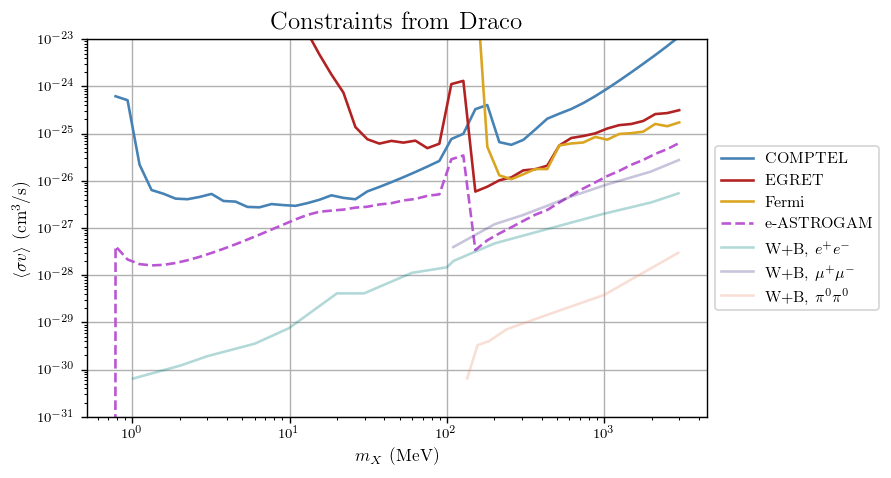

In [14]:
plt.figure(figsize=(8, 4))

# Put a factor of 2 in since WB assume DM is self-conjugate
plt.plot(mxs, lims_comptel, label="COMPTEL", color=colors[0])
plt.plot(mxs, lims_egret, label="EGRET", color=colors[1])
plt.plot(mxs, lims_fermi, label="Fermi", color=colors[2])
plt.plot(mxs, lims_e_astrogam, '--', label="e-ASTROGAM", color=colors[3])

# Plot Weniger+Bartels' constraints
plt.plot(wb_ee_mxs, wb_ee_lims, alpha=0.3, color=colors[4], label=r"W+B, $e^+e^-$")
plt.plot(wb_mumu_mxs, wb_mumu_lims, alpha=0.3, color=colors[5], label=r"W+B, $\mu^+\mu^-$")
plt.plot(wb_pi0pi0_mxs, wb_pi0pi0_lims, alpha=0.3, color=colors[6], label=r"W+B, $\pi^0\pi^0$")

# plt.xlim([0.3, 300])
# plt.xlim(0.3, 280./2.)
plt.ylim([1e-31,1e-23])
plt.xscale("log")
plt.yscale("log")
plt.grid()
plt.xlabel(r"$m_X$ (MeV)")
plt.ylabel(r"$\langle \sigma v \rangle$ (cm$^3$/s)")
plt.title("Constraints from Draco")

# Shrink current axis by 20%
box = plt.gca().get_position()
plt.gca().set_position([box.x0, box.y0, box.width * 0.8, box.height])
# Put a legend to the right of the current axis
plt.gca().legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [13]:
import os
os.system("printf '\a'")

0

## Scratch: convolving with energy resolution

In [8]:
from hazma.gamma_ray_limits.gamma_ray_limit_parameters import energy_res_egret
from hazma.gamma_ray_limits.compute_limits import get_detected_spectrum
from scipy.interpolate import interp1d

In [5]:
# Monochromatic spectrum
line_es = np.array([9.9, 40.])
line_bfs = np.ones(line_es.shape)

# Continuum spectrum
sm = ScalarMediator(50., ms, gsxx, gsff, gsGG, gsFF)
e_gams = np.logspace(0, np.log10(sm.mx)+3, 300)
dndes = sm.spectra(e_gams, 2. * ex(sm.mx))["total"]

# Detected spectrum
dndes_det = get_detected_spectrum(e_gams, dndes, line_es=np.array([sm.mx]), line_bfs=np.array([2.]), energy_res=energy_res_egret)

ValueError: A value in x_new is below the interpolation range.

In [21]:
def get_detected_spectrum(e_gams, dndes, line_es, line_bfs, energy_res):
    # Standard deviation of spectra resolution function
    def sigma_srf(e):
        return e*energy_res(e)

    # Get the spectral resolution function
    def spec_res_fn(ep, e):
        sigma = sigma_srf(e)

        if sigma == 0:
            return np.zeros(ep.shape)
        else:
            return norm.pdf(ep, loc=e, scale=sigma)

    # Source spectrum function
    dnde_src = interp1d(e_gams, dndes)

    # Due to numerical limitations, the convolution must be performed in a
    # window of n_std standard deviations around the mean of the spectral
    # resolution function. N(5; 0, 1) / N(0;, 0, 1) ~ 6e-6, which seems to be
    # a good compromise between accuracy and speed.
    n_std = 6.

    print([(max(e_gams[0], e-n_std*sigma_srf(e)), min(e_gams[-1], e+n_std*sigma_srf(e))) for e in e_gams])

    # Continuum contribution to detected spectrum
    dndes_cont_det = np.array([quad(lambda ep: dnde_src(ep) *
                                    spec_res_fn(ep, e),
                                    max(e_gams[0], e-n_std*sigma_srf(e)),
                                    min(e_gams[-1], e-n_std*sigma_srf(e)))[0]
                               for e in e_gams])

    # Line contribution
    dndes_line_det = np.array([spec_res_fn(e_gams, e) * bf for
                               e, bf in zip(line_es, line_bfs)]).sum(axis=0)

    return interp1d(e_gams, dndes_cont_det + dndes_line_det)

In [9]:
def spec_res_fn(e, energy_res=energy_res_egret):
    eps = energy_res(e)
    
    if eps == 0.:
        return np.zeros(e_gams.shape)
    else:
        srf = np.exp(-(e_gams - e)**2 / (2. * (eps * e)**2))
        return srf / srf.sum()

from scipy.integrate import quad
from scipy.interpolate import interp1d
from scipy.stats import norm

def get_dndes_det(e_gams, dndes, energy_res=energy_res_egret):
    dnde_interp = interp1d(e_gams, dndes)
    
    return np.array([quad(lambda ep: dnde_interp(ep) * norm.pdf(ep, loc=e, scale=e*energy_res(e)),  # e_gams[0], e_gams[-1])[0] for e in e_gams])
                          max(e_gams[0], e - 3*e*energy_res(e)),
                          min(e_gams[-1], e + 3*e*energy_res(e)))[0] for e in e_gams])

In [11]:
line_es = np.array([5., 10.])
line_bfs = np.array([0.5, 2.])

dnde_line_det = np.array([norm.pdf(e_gams, e, e*energy_res_egret(e)) * bf
                          for e, bf in zip(line_es, line_bfs)])

In [12]:
dndes_det = dnde_line_det.sum(axis=0) + get_dndes_det(e_gams, dndes, energy_res_egret)

/Users/acoogan/.pyenv/versions/2.7.13/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  warnings.warn(msg, IntegrationWarning)
/Users/acoogan/.pyenv/versions/2.7.13/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)
/Users/acoogan/.pyenv/versions/2.7.13

In [207]:
norm.pdf(3) / norm.pdf(1)

0.018315638888734182

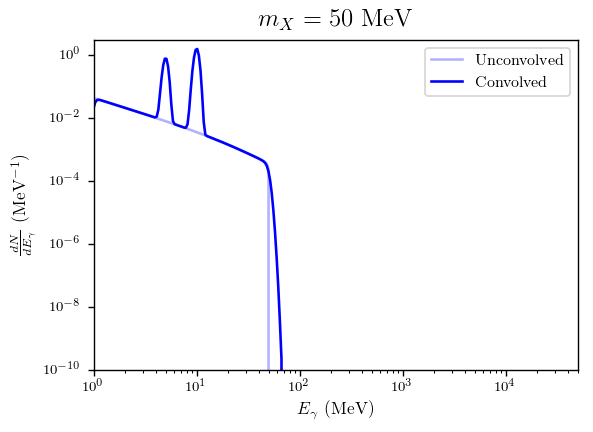

In [203]:
plt.plot(e_gams, dndes, 'b', label="Unconvolved", alpha=0.3)
plt.plot(e_gams, dndes_det, 'b', label="Convolved")

plt.xscale("log")
plt.yscale("log")
plt.xlim(e_gams[[0, -1]])
plt.ylim([1e-10, 3e0])
plt.title(r"$m_X = %.0f$ MeV" % sm.mx)
plt.xlabel(r"$E_\gamma$ (MeV)")
plt.ylabel(r"$\frac{dN}{dE_\gamma}$ (MeV$^{-1}$)")
plt.legend()